<a href="https://colab.research.google.com/github/Chaitanyapatil47/Chaitanyapatil/blob/main/predictive_analysis_for_customer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:55:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression ROC-AUC Score: 0.69
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1586
           1       0.64      0.03      0.06       241

    accuracy                           0.87      1827
   macro avg       0.75      0.51      0.49      1827
weighted avg       0.84      0.87      0.81      1827

Logistic Regression Precision-Recall AUC: 0.26


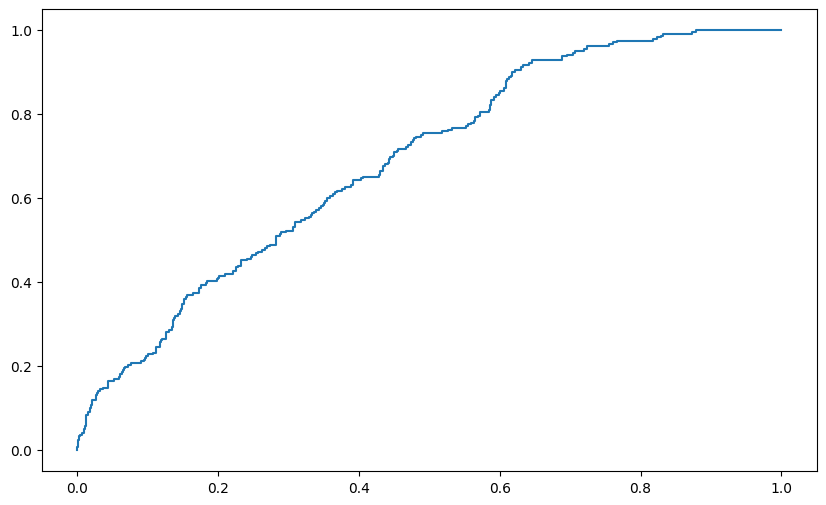

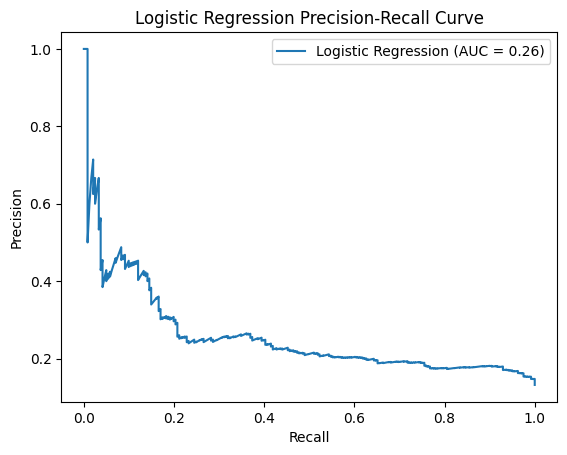

Random Forest ROC-AUC Score: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1586
           1       0.99      1.00      1.00       241

    accuracy                           1.00      1827
   macro avg       1.00      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827

Random Forest Precision-Recall AUC: 1.00


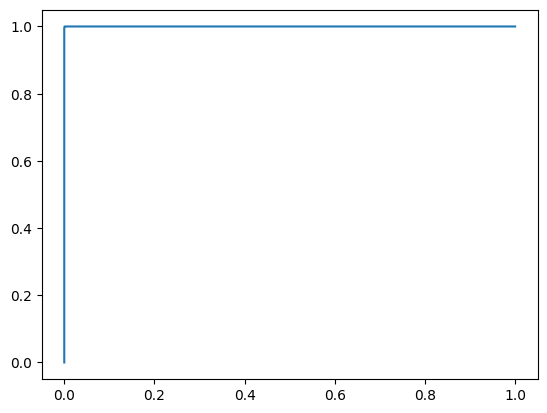

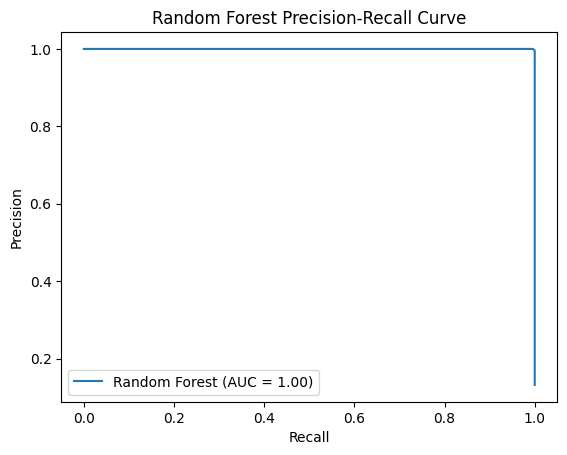

XGBoost ROC-AUC Score: 1.00
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1586
           1       0.97      0.99      0.98       241

    accuracy                           0.99      1827
   macro avg       0.98      0.99      0.99      1827
weighted avg       0.99      0.99      0.99      1827

XGBoost Precision-Recall AUC: 1.00


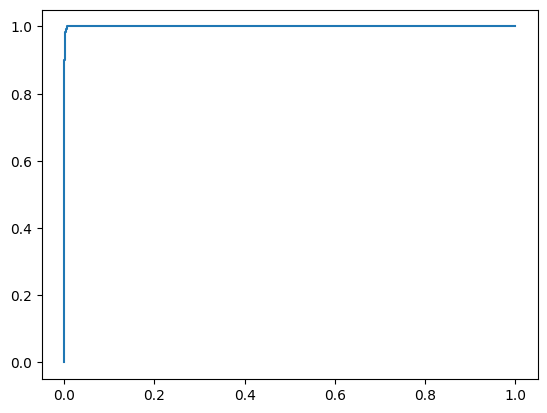

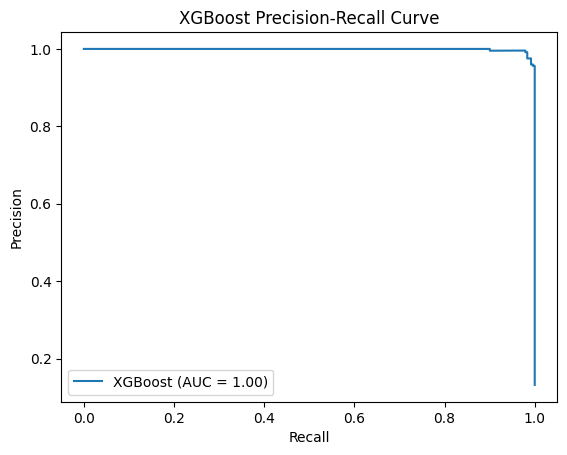

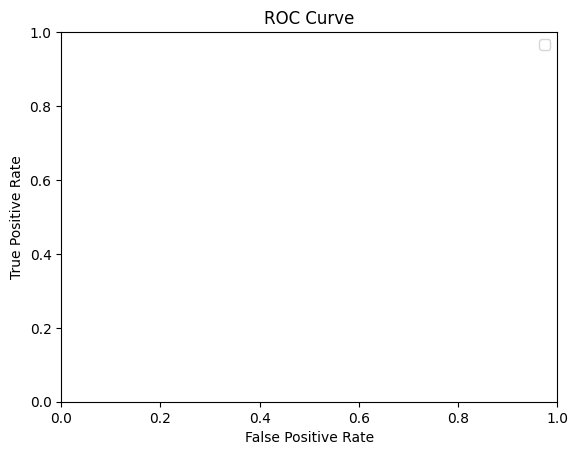

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv("/content/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv")

# Step 1: Data Cleaning
# Drop unnecessary columns
data.drop(["Customer", "Effective To Date"], axis=1, inplace=True)

# Convert categorical features to numeric using Label Encoding
categorical_columns = data.select_dtypes(include=["object"]).columns
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Check for missing values
data.fillna(data.median(), inplace=True)

# Step 2: Feature Engineering
# Create a feature for income bucket
data["Income_Bucket"] = pd.cut(data["Income"], bins=[0, 30000, 60000, 90000, 120000], labels=["Low", "Medium", "High", "Very High"])
data["Income_Bucket"] = le.fit_transform(data["Income_Bucket"].astype(str))

# Drop the original income column to avoid redundancy
data.drop("Income", axis=1, inplace=True)

# Step 3: Splitting the Data
X = data.drop(["Response"], axis=1)
y = data["Response"]

# Standardize numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# Step 4: Train Models
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict_proba(X_test)[:, 1]

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=52)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict_proba(X_test)[:, 1]

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]

# Step 5: Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} ROC-AUC Score: {roc_auc:.2f}")

    # Classification Report
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, (y_pred > 0.5).astype(int)))

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    print(f"{model_name} Precision-Recall AUC: {pr_auc:.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

    # Plot Precision-Recall Curve
    plt.figure()
    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} Precision-Recall Curve")
    plt.legend()
    plt.show()

# Evaluate all models
plt.figure(figsize=(10, 6))
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
